In [9]:
import numpy as np
import pandas as pd
import mlflow

In [10]:
df = pd.read_csv('dataset.csv')
df.head()

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1


In [ ]:
mlflow.set_tracking_uri('http://ec2-51-20-64-139.eu-north-1.compute.amazonaws.com:5000')
mlflow.set_experiment('exp 3 - Tfidf Bigram max_features')

<Experiment: artifact_location='s3://neeraj-first-bucket/853446401950106718', creation_time=1736760494437, experiment_id='853446401950106718', last_update_time=1736760494437, lifecycle_stage='active', name='Exp 3 - Tfidf Bigram max_features', tags={}>

In [12]:
df.dropna(inplace=True)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
def run_experiment(max_features):
    ngram_range = (1, 2)

    # vectorizer
    vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)

    # split data
    X_train, X_test, y_train, y_test = train_test_split(df['clean_comment'], df['category'], test_size=0.2)

    # transform
    X_train_trf = vectorizer.fit_transform(X_train)
    X_test_trf = vectorizer.transform(X_test)

    with mlflow.start_run() as run:
        mlflow.set_tag("mlflow.runName", f"Tfidf_bigram_max_features_{max_features}")
        mlflow.set_tag("experiment_type", "feature_engineering")
        mlflow.set_tag("model_type", f"RandomForestClassifier")

        mlflow.set_tag("discription", f"RandomForest with Tfidf bigrams, max_features={max_features}")

        n_estimators = 200
        max_depth = 15
        
        mlflow.log_param("n_estimators", n_estimators)
        mlflow.log_param("max_depth", max_depth)
        mlflow.log_param("vectorizer_type", "Tfidf")
        mlflow.log_param("ngram_range", ngram_range)
        mlflow.log_param("vectorizer_max_features", max_features)

        # model
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train_trf, y_train)
        y_pred = model.predict(X_test_trf)

        # metrics
        accuracy = accuracy_score(y_test, y_pred)
        class_report = classification_report(y_test, y_pred, output_dict=True)
        conf_mat = confusion_matrix(y_test, y_pred)

        mlflow.log_metric("accuracy", accuracy)
        for label, metrics in class_report.items():
            if isinstance(metrics, dict):
                for metric, value in metrics.items():
                    mlflow.log_metric(f"{label}_{metric}", value)

        # save confusion matrix
        plt.figure(figsize=(8,6))
        sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
        plt.ylabel("Actual")
        plt.xlabel("Predicted")
        plt.savefig("confusion_matrix_of_exp3.png")
        mlflow.log_artifact("confusion_matrix_of_exp3.png")
        plt.show()
        
        # Log the model
        mlflow.sklearn.log_model(model, f"random_forest_model_tfidf_bigrams_{max_features}")

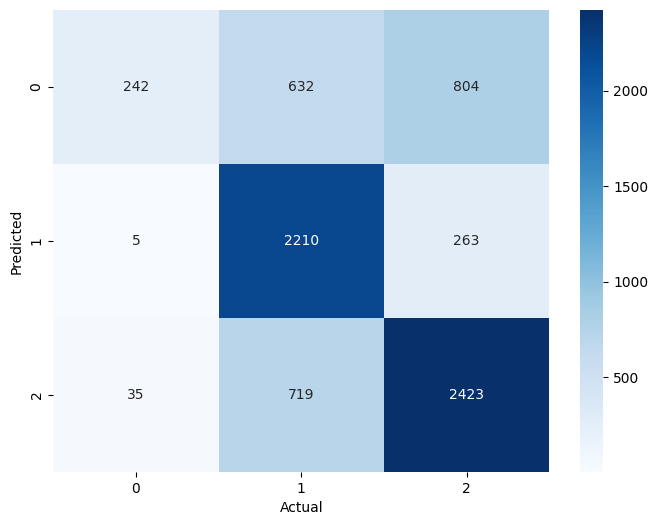

2025/01/13 16:06:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Tfidf_bigram_max_features_1000 at: http://ec2-13-61-2-37.eu-north-1.compute.amazonaws.com:5000/#/experiments/853446401950106718/runs/fe49c796b6d84e2e8adfa0dace2582ef
🧪 View experiment at: http://ec2-13-61-2-37.eu-north-1.compute.amazonaws.com:5000/#/experiments/853446401950106718


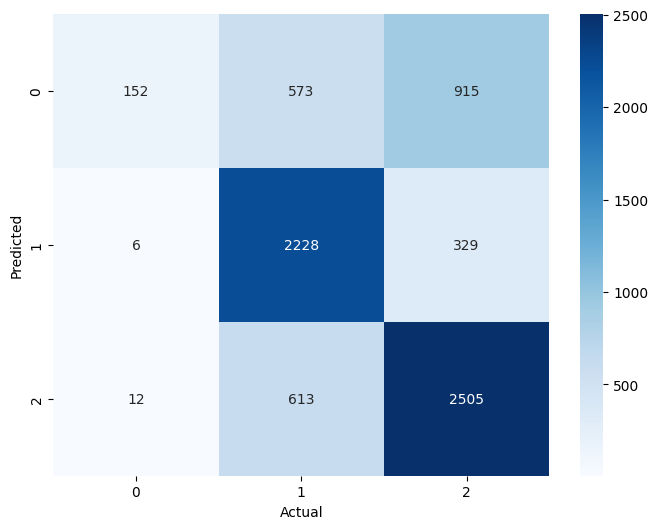

2025/01/13 16:07:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Tfidf_bigram_max_features_2000 at: http://ec2-13-61-2-37.eu-north-1.compute.amazonaws.com:5000/#/experiments/853446401950106718/runs/47d924e76b1c4196aadeccecb3a96af0
🧪 View experiment at: http://ec2-13-61-2-37.eu-north-1.compute.amazonaws.com:5000/#/experiments/853446401950106718


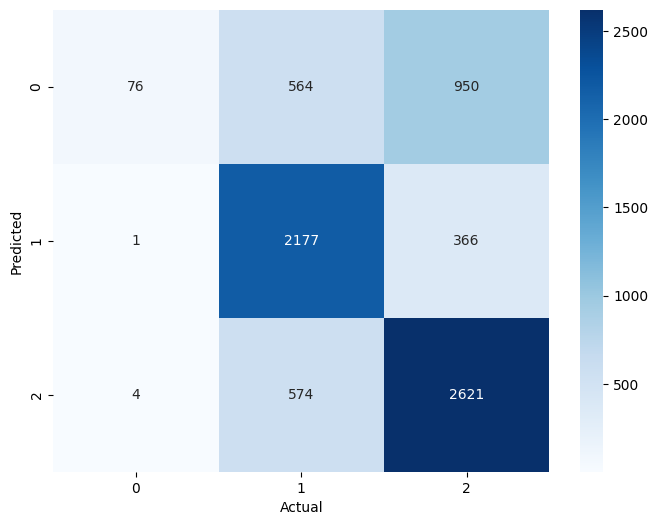

2025/01/13 16:08:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Tfidf_bigram_max_features_3000 at: http://ec2-13-61-2-37.eu-north-1.compute.amazonaws.com:5000/#/experiments/853446401950106718/runs/aa666b8cc0854a9db9b35f4e733655ef
🧪 View experiment at: http://ec2-13-61-2-37.eu-north-1.compute.amazonaws.com:5000/#/experiments/853446401950106718


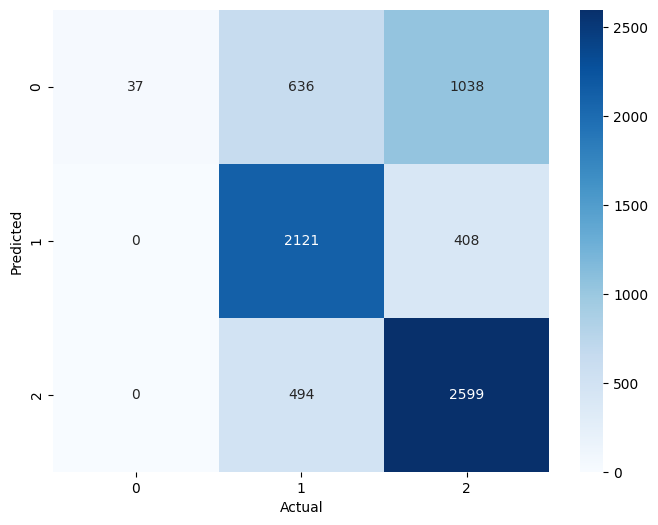

2025/01/13 16:09:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Tfidf_bigram_max_features_4000 at: http://ec2-13-61-2-37.eu-north-1.compute.amazonaws.com:5000/#/experiments/853446401950106718/runs/10752fdc9301468bbca55b4bdbc82d77
🧪 View experiment at: http://ec2-13-61-2-37.eu-north-1.compute.amazonaws.com:5000/#/experiments/853446401950106718


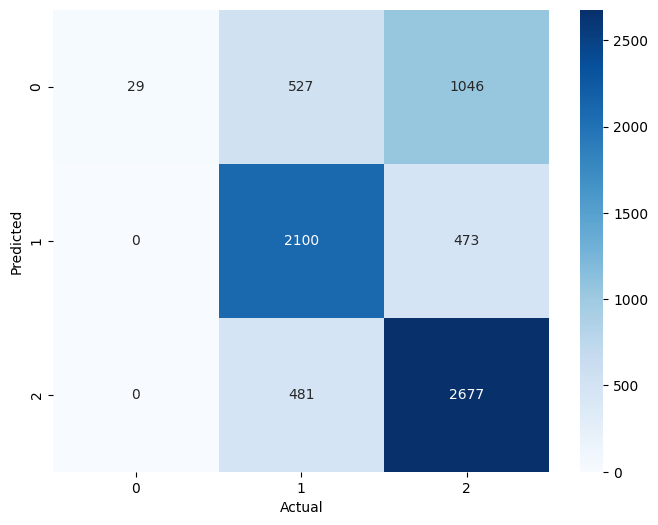

2025/01/13 16:10:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Tfidf_bigram_max_features_5000 at: http://ec2-13-61-2-37.eu-north-1.compute.amazonaws.com:5000/#/experiments/853446401950106718/runs/5b15b27f27304ede86ea64138448ad3b
🧪 View experiment at: http://ec2-13-61-2-37.eu-north-1.compute.amazonaws.com:5000/#/experiments/853446401950106718


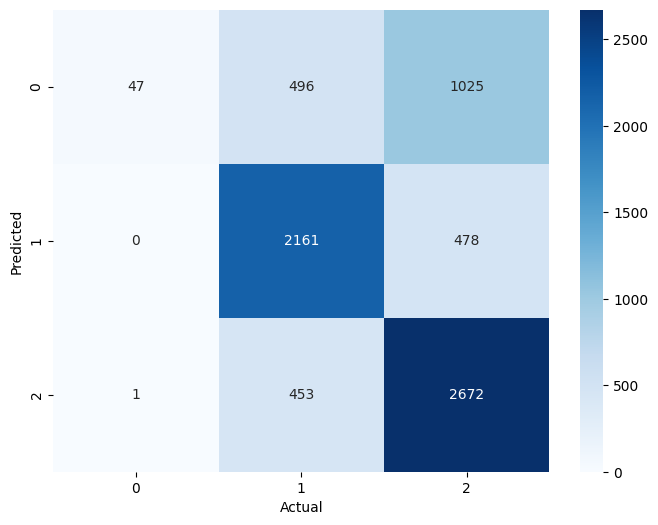

2025/01/13 16:11:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Tfidf_bigram_max_features_6000 at: http://ec2-13-61-2-37.eu-north-1.compute.amazonaws.com:5000/#/experiments/853446401950106718/runs/297ebc24b01b442da4a7f3927b8cf818
🧪 View experiment at: http://ec2-13-61-2-37.eu-north-1.compute.amazonaws.com:5000/#/experiments/853446401950106718


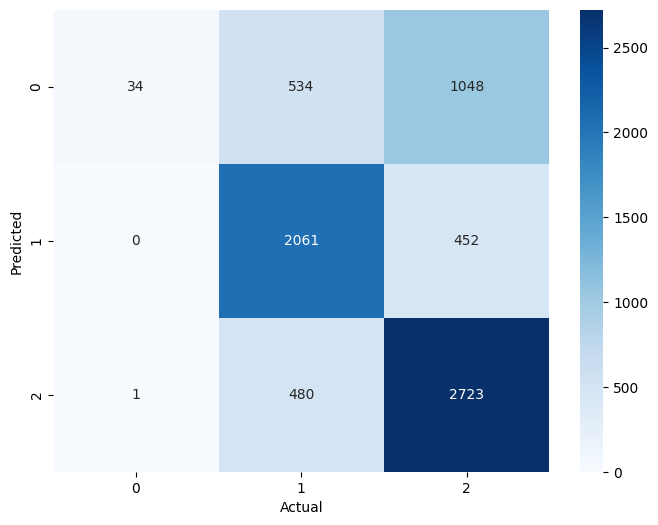

2025/01/13 16:12:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Tfidf_bigram_max_features_7000 at: http://ec2-13-61-2-37.eu-north-1.compute.amazonaws.com:5000/#/experiments/853446401950106718/runs/431c7424aed6416c9f5356717adccf9a
🧪 View experiment at: http://ec2-13-61-2-37.eu-north-1.compute.amazonaws.com:5000/#/experiments/853446401950106718


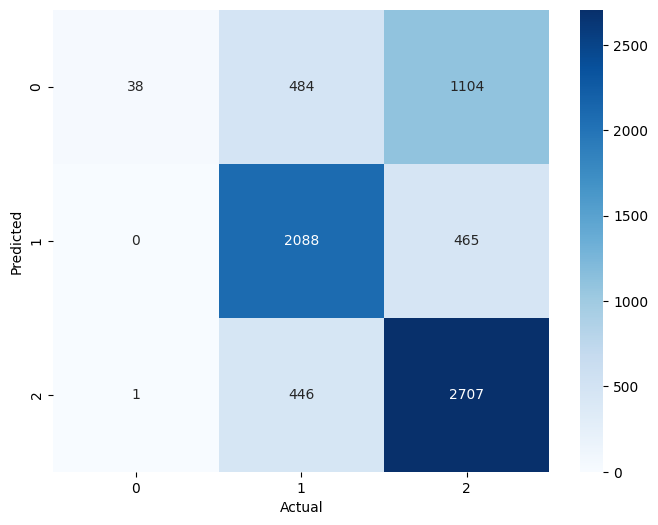

2025/01/13 16:12:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Tfidf_bigram_max_features_8000 at: http://ec2-13-61-2-37.eu-north-1.compute.amazonaws.com:5000/#/experiments/853446401950106718/runs/b1c1a0803e53442890530034a5152e71
🧪 View experiment at: http://ec2-13-61-2-37.eu-north-1.compute.amazonaws.com:5000/#/experiments/853446401950106718


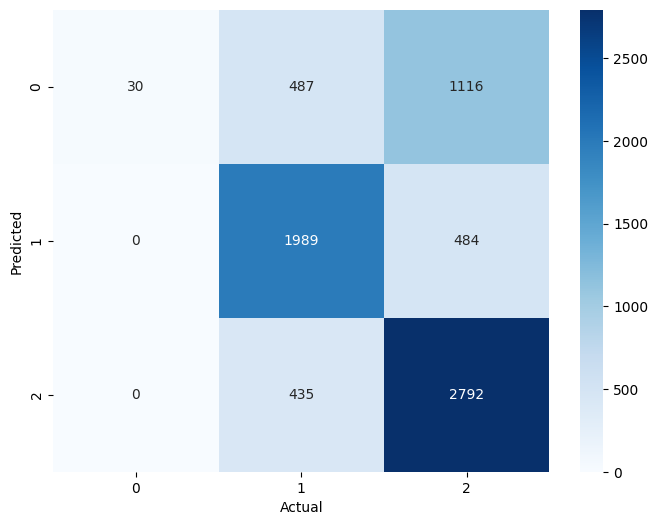

2025/01/13 16:13:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Tfidf_bigram_max_features_9000 at: http://ec2-13-61-2-37.eu-north-1.compute.amazonaws.com:5000/#/experiments/853446401950106718/runs/a15a2055e2644ebeab105f4cd8088529
🧪 View experiment at: http://ec2-13-61-2-37.eu-north-1.compute.amazonaws.com:5000/#/experiments/853446401950106718


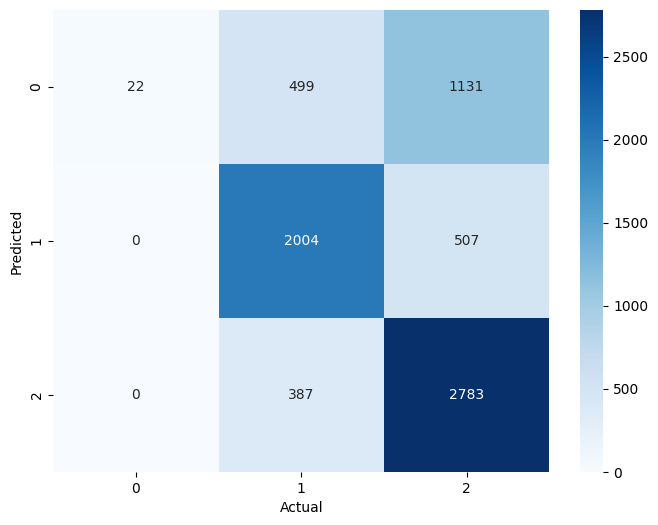

2025/01/13 16:14:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Tfidf_bigram_max_features_10000 at: http://ec2-13-61-2-37.eu-north-1.compute.amazonaws.com:5000/#/experiments/853446401950106718/runs/6d4f6510892046818c79de6c4bfb20e7
🧪 View experiment at: http://ec2-13-61-2-37.eu-north-1.compute.amazonaws.com:5000/#/experiments/853446401950106718


In [19]:
# Step 6: Test various max_features values
max_features_values = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 12000]

for max_features in max_features_values:
    run_experiment(max_features)